In [87]:
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# from sklearn.linear_model import LogisticRegression
# from sklearn.feature_extraction.text import TfidfVectorizer
# import re
# from sklearn.model_selection import train_test_split
# from nltk.corpus  import stopwords
# from nltk.stem import WordNetLemmatizer


In [104]:
import pandas as pd
import numpy as np
# import pandas_profiling
import re
from nltk.corpus  import stopwords
from nltk.stem import WordNetLemmatizer
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
# from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud  import WordCloud
# from textwrap import wrap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
# from PIL import Image
from sklearn.linear_model import LogisticRegression
import nltk
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Alex\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Alex\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\wordnet.zip.


True

In [94]:
data = pd.read_csv('data/trainset.csv')
data.head()

,Sentence,Sentiment
0,According to the Finnish-Russian Chamber of Co...,neutral
1,The Swedish buyout firm has sold its remaining...,neutral
2,$SPY wouldn't be surprised to see a green close,positive
3,Shell's $70 Billion BG Deal Meets Shareholder ...,negative
4,SSH COMMUNICATIONS SECURITY CORP STOCK EXCHANG...,negative


In [95]:
data.shape

(4382, 2)

#### 2. Feature Engineering

In [105]:
def cleaning(df1):
    lowered=df1.lower() # lowering the sentences 
    removed=re.sub(r'[^a-z]',' ',lowered)  # replacing the non alphabets with space 
    splitted=removed.split(' ')   # splitting the sentences by spaces to lemmatize
    df1= [WordNetLemmatizer().lemmatize(word) for word in splitted if word not in stopwords.words('english')]  # lemmatizing and removing stopwords
    df1=' '.join(df1) # joining back the words of list
    return(removed)

In [106]:
data['Sentence'] = data['Sentence'].apply(cleaning)
data.head()

,Sentence,Sentiment
0,according to the finnish russian chamber of co...,neutral
1,the swedish buyout firm has sold its remaining...,neutral
2,spy wouldn t be surprised to see a green close,positive
3,shell s billion bg deal meets shareholder ...,negative
4,ssh communications security corp stock exchang...,negative


In [107]:
data['Sentence'].values[0]

'according to the finnish russian chamber of commerce   all the major construction companies of finland are operating in russia  '

**Word Cloud**

In [111]:
corpus=' '.join(data['Sentence'])

In [112]:
word_cloud=WordCloud().generate(corpus)
word_cloud

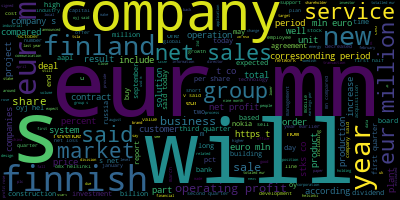

In [113]:
img = word_cloud.to_image()
img

In [114]:
# for tfidf vectorizer
tfidf=TfidfVectorizer()
transformed_data=tfidf.fit_transform(data['Sentence'])
data_dtm = pd.DataFrame(transformed_data.toarray(), columns=tfidf.get_feature_names())
data_dtm.head()

,aaland,aaltonen,aapl,aaron,aava,aazhang,ab,abb,abbv,abc,...,zone,zoo,zp,zs,zsl,zte,zurich,zwe,zwhthsvfsf,zy
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [115]:
data_dtm.shape

(4382, 8920)

In [116]:
data.shape

(4382, 2)

In [117]:
data.index

RangeIndex(start=0, stop=4382, step=1)

In [118]:
data_dtm['Sentiment'] = data['Sentiment']
data_dtm

,aaland,aaltonen,aapl,aaron,aava,aazhang,ab,abb,abbv,abc,...,zoo,zp,zs,zsl,zte,zurich,zwe,zwhthsvfsf,zy,Sentiment
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,neutral
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,neutral
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,positive
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,negative
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4377,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,neutral
4378,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,negative
4379,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,negative
4380,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,neutral


In [152]:
X_train, X_test, y_train, y_test = train_test_split(data["Sentence"].values, data["Sentiment"].values, shuffle=True,test_size=0.1)

In [153]:
# # Convert a collection of raw documents to a matrix of TF-IDF features.
# # TODO : try different hyperparameters for the function below
tfidf = TfidfVectorizer(strip_accents="ascii", lowercase=True,ngram_range=(1,1),max_features=1000)
tfTrain = tfidf.fit_transform(X_train) 
tfTest = tfidf.transform(X_test)

In [121]:
# some of the words
tfidf.get_feature_names()[:10]

['aaland',
 'aaltonen',
 'aapl',
 'aaron',
 'aava',
 'aazhang',
 'ab',
 'abb',
 'abbv',
 'abc']

In [122]:
le = LabelEncoder()
data_dtm['Sentiment']=le.fit_transform(data_dtm['Sentiment'])
data_dtm.head()

,aaland,aaltonen,aapl,aaron,aava,aazhang,ab,abb,abbv,abc,...,zoo,zp,zs,zsl,zte,zurich,zwe,zwhthsvfsf,zy,Sentiment
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [123]:
le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
le_name_mapping

{'negative': 0, 'neutral': 1, 'positive': 2}

In [124]:
# X_train, X_test, y_train, y_test = train_test_split(
#     data["Sentence"].values, data["Sentiment"].values, shuffle=True,test_size=0.1
#     )

In [230]:
X_train, X_test, y_train, y_test = train_test_split(data_dtm.drop('Sentiment',axis=1),data_dtm['Sentiment'],test_size=0.1,stratify=data_dtm['Sentiment'])

In [126]:
X_train.head()

,aaland,aaltonen,aapl,aaron,aava,aazhang,ab,abb,abbv,abc,...,zone,zoo,zp,zs,zsl,zte,zurich,zwe,zwhthsvfsf,zy
3974,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3940,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
175,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2256,0.0,0.0,0.241353,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1181,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [127]:
X_test.head()

,aaland,aaltonen,aapl,aaron,aava,aazhang,ab,abb,abbv,abc,...,zone,zoo,zp,zs,zsl,zte,zurich,zwe,zwhthsvfsf,zy
3113,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1768,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2049,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2246,0.0,0.0,0.351628,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### 3. Model Building

In [221]:
# # Logistic Regressor
# # TODO : Try different hyperparameters for model
# ‘liblinear’ better for smaleler datasets
# intercept_scaling, used with ‘liblinear’ tocreate a synthetic feature
LR = LogisticRegression(max_iter=200,solver="liblinear",intercept_scaling=0.2,penalty="l1").fit(tfTrain, y_train)
# LR

In [222]:
LRpred = LR.predict(tfTest)

In [223]:
LR.score(tfTest,y_test)

0.7312072892938497

In [130]:
# TODO : Try Other models and report score

In [231]:
from sklearn.decomposition import PCA
pca=PCA(n_components=3000)
X_train=pca.fit_transform(X_train)

In [232]:
X_train.shape

(3943, 3000)

In [233]:
X_test=pca.transform(X_test)

In [234]:
svc=SVC(kernel='linear')
svc.fit(X_train,y_train)

SVC(kernel='linear')

In [235]:
y_pred=svc.predict(X_test)

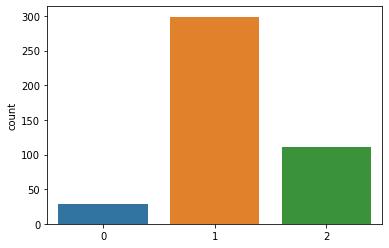

In [236]:
sns.countplot(y_pred)

In [237]:
confusion_matrix(y_test,y_pred)

array([[ 15,  41,   8],
       [  6, 216,  15],
       [  8,  42,  88]], dtype=int64)

In [238]:
from sklearn.metrics import roc_auc_score

In [239]:
svc.score(X_test,y_test)

0.7266514806378133

In [240]:
svcPred = svc.predict(X_test)

#### 4. Model Testing

In [241]:
from sklearn.metrics import f1_score

In [242]:
f1score = f1_score(svcPred, y_test, average='weighted')
acc = np.mean(svcPred==y_test)
"The accuracy is {0} and the F1 score is {1}".format(acc, f1score)

'The accuracy is 0.7266514806378133 and the F1 score is 0.7489698056078457'

In [244]:
# Weighted accounts for class imbalance
f1score = f1_score(LRpred, y_test, average='weighted')
acc = np.mean(LRpred==y_test)
"The accuracy is {0} and the F1 score is {1}".format(acc, f1score)

ValueError: Mix of label input types (string and number)

#### 5. Predicting

In [245]:
test_df = pd.read_csv("data/testset.csv")
test_df.head()


,Sentence
0,Earnings per share ( EPS ) dropped to EUR 0.21...
1,$SONC Amazing run since middle of March - obvi...
2,"Ruukki Romania , the local arm of Finnish meta..."
3,Self-service and automation are in a bigger ro...
4,Alma Media 's operating profit amounted to EUR...


In [246]:
file = "data/predictions.csv"
finalPred = LR.predict(tfidf.fit_transform(test_df['Sentence']))
sentFinal = test_df['Sentence'].values

with open(file, "w+") as f:
    f.write("Sentiment\n")
    for i in range(len(finalPred)):
        f.write(finalPred[i] + '\n')

In [247]:
finalTestPred = pd.read_csv("data/predictions.csv")
finalTestPred.head()


,Sentiment
0,neutral
1,neutral
2,positive
3,neutral
4,neutral
